# Mathematical Walkthrough: HAR-Lasso Bipartite Network

A step-by-step visualization of the linear algebra in this project, using actual data dimensions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11

---
## Step 1: Raw Data Matrices

We start with two raw data sources.

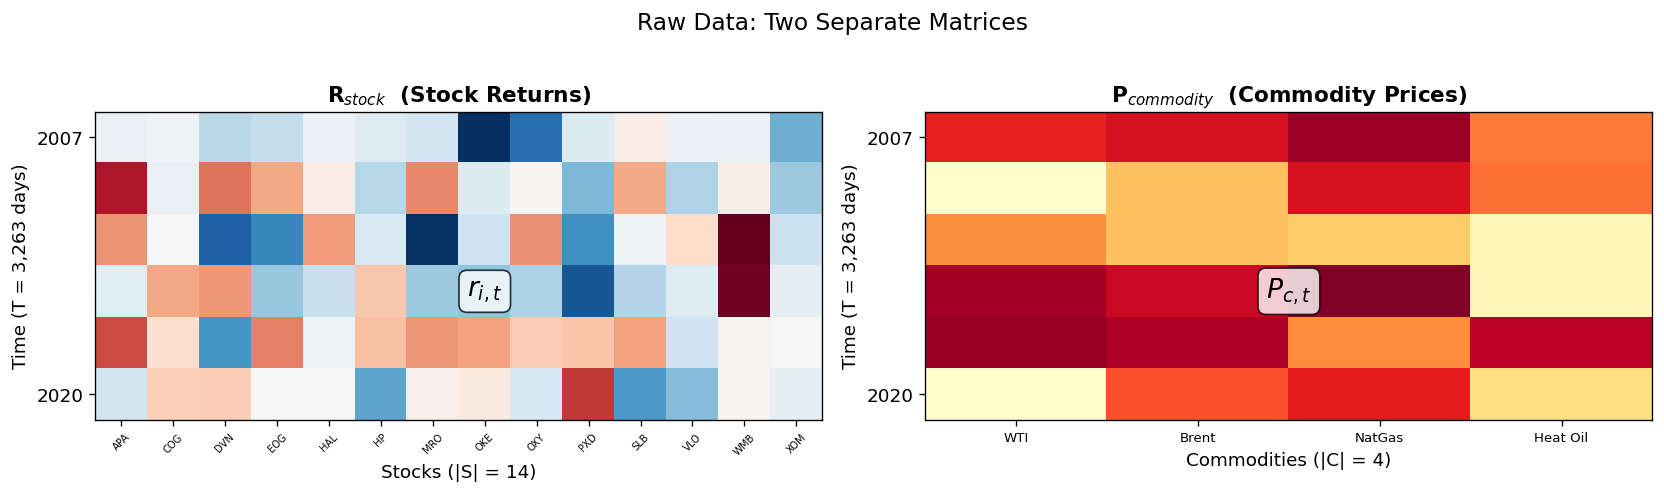

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Stock returns matrix
ax = axes[0]
stock_mat = ax.imshow(np.random.randn(6, 14) * 0.02, cmap='RdBu_r', aspect='auto', vmin=-0.05, vmax=0.05)
ax.set_title(r'$\mathbf{R}_{stock}$  (Stock Returns)', fontsize=13, fontweight='bold')
ax.set_ylabel('Time (T = 3,263 days)')
ax.set_xlabel('Stocks (|S| = 14)')
ax.set_xticks(range(14))
ax.set_xticklabels(['APA','COG','DVN','EOG','HAL','HP','MRO','OKE','OXY','PXD','SLB','VLO','WMB','XOM'], 
                    fontsize=6, rotation=45)
ax.set_yticks([0, 5])
ax.set_yticklabels(['2007', '2020'])
ax.text(7, 3, r'$r_{i,t}$', fontsize=16, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Commodity prices matrix
ax = axes[1]
comm_mat = ax.imshow(np.random.rand(6, 4) * 100, cmap='YlOrRd', aspect='auto')
ax.set_title(r'$\mathbf{P}_{commodity}$  (Commodity Prices)', fontsize=13, fontweight='bold')
ax.set_ylabel('Time (T = 3,263 days)')
ax.set_xlabel('Commodities (|C| = 4)')
ax.set_xticks(range(4))
ax.set_xticklabels(['WTI', 'Brent', 'NatGas', 'Heat Oil'], fontsize=8)
ax.set_yticks([0, 5])
ax.set_yticklabels(['2007', '2020'])
ax.text(1.5, 3, r'$P_{c,t}$', fontsize=16, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Raw Data: Two Separate Matrices', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

---
## Step 2: HAR Feature Construction

For each commodity $c$, we transform its price series into **3 return horizons**:

$$r^{(d)}_{c,t} = \frac{P_{c,t} - P_{c,t-1}}{P_{c,t-1}}$$

$$r^{(w)}_{c,t} = \frac{1}{5}\sum_{k=0}^{4} r^{(d)}_{c,t-k}$$

$$r^{(m)}_{c,t} = \frac{1}{22}\sum_{k=0}^{21} r^{(d)}_{c,t-k}$$

Then we **lag** by one day (use $t-1$ to predict $t$):

$$X_{c,t} = \begin{bmatrix} r^{(d)}_{c,t-1} & r^{(w)}_{c,t-1} & r^{(m)}_{c,t-1} \end{bmatrix}$$

/var/folders/vq/lkyht8f53ydbr6yjq72tywv40000gn/T/ipykernel_44376/597301738.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


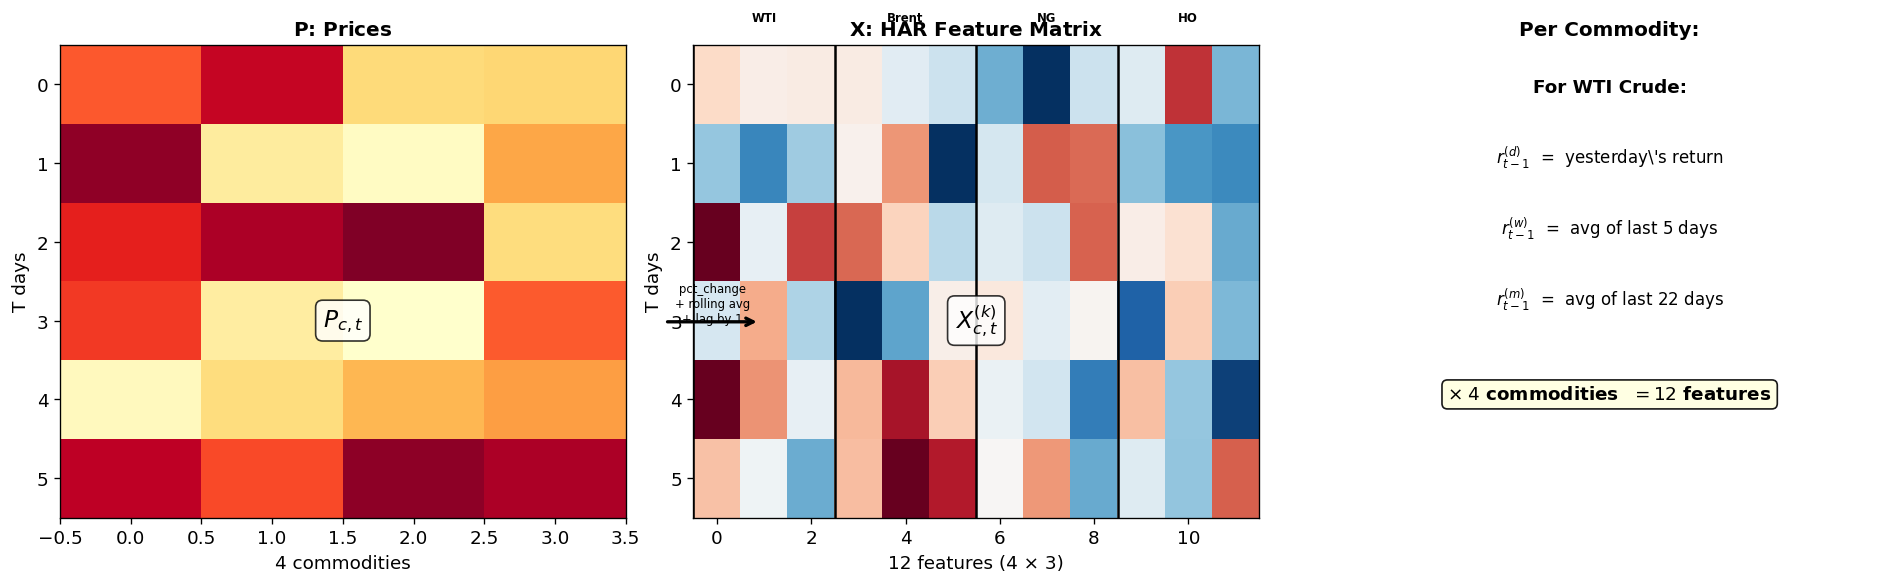

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 4 commodity prices → 4 daily returns
ax = axes[0]
ax.imshow(np.random.rand(6, 4) * 100, cmap='YlOrRd', aspect='auto')
ax.set_title(r'$\mathbf{P}$: Prices', fontsize=12, fontweight='bold')
ax.set_xlabel('4 commodities')
ax.set_ylabel('T days')
ax.text(1.5, 3, r'$P_{c,t}$', fontsize=14, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Arrow
ax_arrow = fig.add_axes([0.35, 0.4, 0.05, 0.1])
ax_arrow.annotate('', xy=(1, 0.5), xytext=(0, 0.5),
                  arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax_arrow.text(0.5, 0.8, 'pct_change\n+ rolling avg\n+ lag by 1', 
              ha='center', va='center', fontsize=7, transform=ax_arrow.transAxes)
ax_arrow.axis('off')

# HAR features: 4 commodities × 3 horizons = 12 columns
ax = axes[1]
har_data = np.random.randn(6, 12) * 0.02
ax.imshow(har_data, cmap='RdBu_r', aspect='auto', vmin=-0.04, vmax=0.04)
ax.set_title(r'$\mathbf{X}$: HAR Feature Matrix', fontsize=12, fontweight='bold')
ax.set_xlabel('12 features (4 × 3)')
ax.set_ylabel('T days')

# Label groups
for i, name in enumerate(['WTI', 'Brent', 'NG', 'HO']):
    ax.axvline(i*3 - 0.5, color='black', linewidth=1.5)
    ax.text(i*3 + 1, -0.8, name, ha='center', fontsize=7, fontweight='bold')

ax.text(5.5, 3, r'$X_{c,t}^{(k)}$', fontsize=14, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Show one commodity's 3 features
ax = axes[2]
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')
ax.set_title('Per Commodity:', fontsize=12, fontweight='bold')

ax.text(5, 9, r'For WTI Crude:', fontsize=11, ha='center', fontweight='bold')
ax.text(5, 7.5, r'$r^{(d)}_{t-1}$  =  yesterday\'s return', fontsize=10, ha='center')
ax.text(5, 6, r'$r^{(w)}_{t-1}$  =  avg of last 5 days', fontsize=10, ha='center')
ax.text(5, 4.5, r'$r^{(m)}_{t-1}$  =  avg of last 22 days', fontsize=10, ha='center')

ax.text(5, 2.5, r'$\times\; 4$ commodities  $= 12$ features', fontsize=11, 
        ha='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()

---
## Step 3: The Lasso Regression (Per Stock)

For **each** stock $i \in S$, we solve:

$$\min_{\beta_i} \;\; \underbrace{\| \mathbf{r}_i - \mathbf{X} \boldsymbol{\beta}_i \|_2^2}_{\text{prediction error}} \;+\; \underbrace{\lambda \| \boldsymbol{\beta}_i \|_1}_{\text{sparsity penalty}}$$

where:
- $\mathbf{r}_i \in \mathbb{R}^{T}$ is the return vector for stock $i$
- $\mathbf{X} \in \mathbb{R}^{T \times 12}$ is the HAR feature matrix (same for all stocks)
- $\boldsymbol{\beta}_i \in \mathbb{R}^{12}$ is the coefficient vector we're solving for
- $\lambda > 0$ controls sparsity (higher $\lambda$ → more zeros in $\beta$)

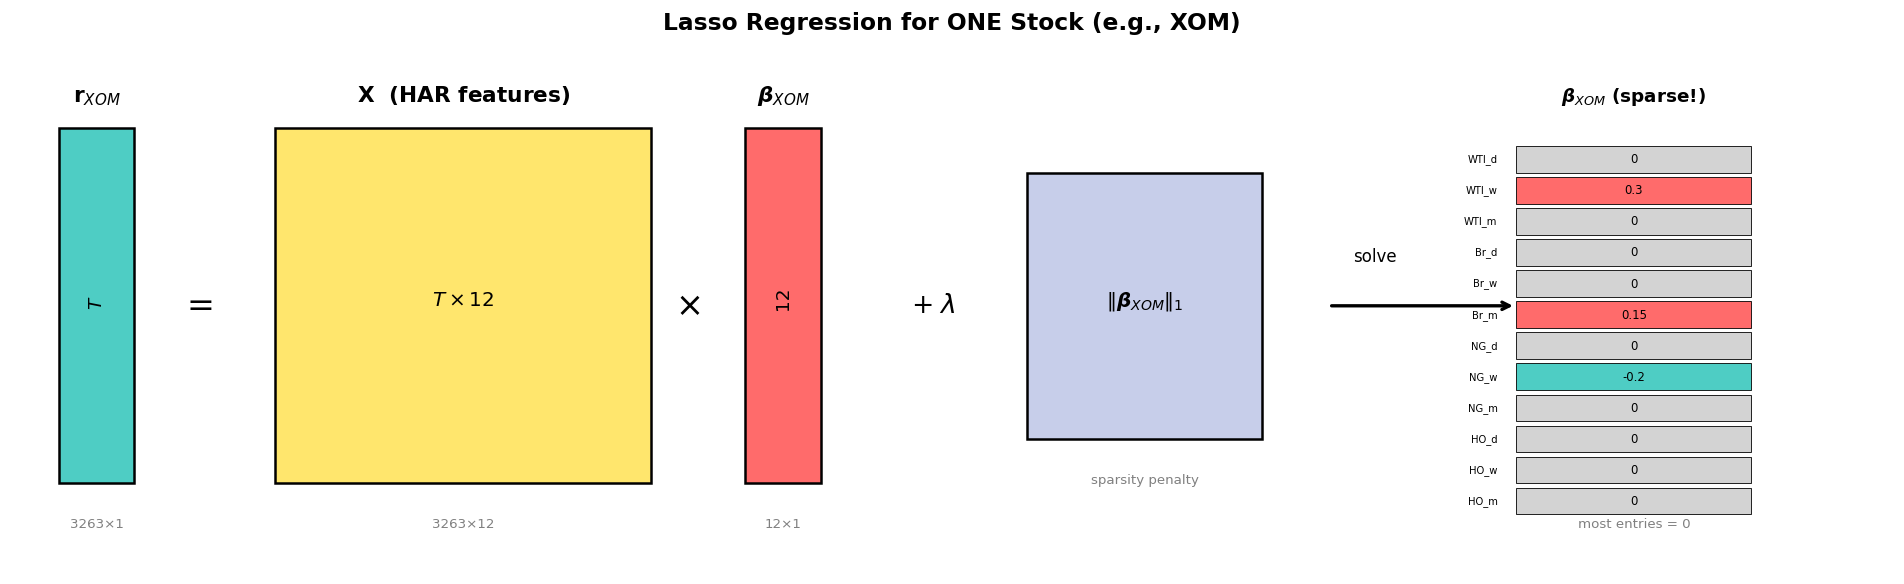

In [4]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.set_xlim(0, 20)
ax.set_ylim(0, 6)
ax.axis('off')
ax.set_title('Lasso Regression for ONE Stock (e.g., XOM)', fontsize=14, fontweight='bold')

# r_i vector
rect_r = plt.Rectangle((0.5, 1), 0.8, 4, fill=True, facecolor='#4ECDC4', edgecolor='black', linewidth=1.5)
ax.add_patch(rect_r)
ax.text(0.9, 5.3, r'$\mathbf{r}_{XOM}$', fontsize=13, ha='center', fontweight='bold')
ax.text(0.9, 3, r'$T$', fontsize=11, ha='center', rotation=90)
ax.text(0.9, 0.5, '3263×1', fontsize=8, ha='center', color='gray')

# = sign
ax.text(2, 3, '=', fontsize=20, ha='center', va='center')

# X matrix
rect_X = plt.Rectangle((2.8, 1), 4, 4, fill=True, facecolor='#FFE66D', edgecolor='black', linewidth=1.5)
ax.add_patch(rect_X)
ax.text(4.8, 5.3, r'$\mathbf{X}$  (HAR features)', fontsize=13, ha='center', fontweight='bold')
ax.text(4.8, 3, r'$T \times 12$', fontsize=12, ha='center')
ax.text(4.8, 0.5, '3263×12', fontsize=8, ha='center', color='gray')

# × sign
ax.text(7.2, 3, '×', fontsize=20, ha='center', va='center')

# beta vector
rect_b = plt.Rectangle((7.8, 1), 0.8, 4, fill=True, facecolor='#FF6B6B', edgecolor='black', linewidth=1.5)
ax.add_patch(rect_b)
ax.text(8.2, 5.3, r'$\boldsymbol{\beta}_{XOM}$', fontsize=13, ha='center', fontweight='bold')
ax.text(8.2, 3, '12', fontsize=11, ha='center', rotation=90)
ax.text(8.2, 0.5, '12×1', fontsize=8, ha='center', color='gray')

# + lambda penalty
ax.text(9.8, 3, r'$+\;\lambda$', fontsize=16, ha='center', va='center')

# beta L1 norm illustration
rect_l1 = plt.Rectangle((10.8, 1.5), 2.5, 3, fill=True, facecolor='#C7CEEA', edgecolor='black', linewidth=1.5)
ax.add_patch(rect_l1)
ax.text(12.05, 3, r'$\|\boldsymbol{\beta}_{XOM}\|_1$', fontsize=12, ha='center')
ax.text(12.05, 1.0, 'sparsity penalty', fontsize=8, ha='center', color='gray')

# Arrow to result
ax.annotate('', xy=(16, 3), xytext=(14, 3),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax.text(14.5, 3.5, 'solve', fontsize=10, ha='center')

# Sparse beta result
beta_vals = [0, 0.3, 0, 0, 0, 0.15, 0, -0.2, 0, 0, 0, 0]
colors_b = ['lightgray' if v == 0 else ('#FF6B6B' if v > 0 else '#4ECDC4') for v in beta_vals]
labels = ['WTI_d', 'WTI_w', 'WTI_m', 'Br_d', 'Br_w', 'Br_m',
          'NG_d', 'NG_w', 'NG_m', 'HO_d', 'HO_w', 'HO_m']

for j, (val, col, lab) in enumerate(zip(beta_vals, colors_b, labels)):
    y = 4.5 - j * 0.35
    rect = plt.Rectangle((16, y), 2.5, 0.3, fill=True, facecolor=col, edgecolor='black', linewidth=0.5)
    ax.add_patch(rect)
    ax.text(15.8, y + 0.15, lab, fontsize=6, ha='right', va='center')
    ax.text(17.25, y + 0.15, f'{val}', fontsize=7, ha='center', va='center')

ax.text(17.25, 5.3, r'$\boldsymbol{\beta}_{XOM}$ (sparse!)', fontsize=11, ha='center', fontweight='bold')
ax.text(17.25, 0.5, 'most entries = 0', fontsize=8, ha='center', color='gray')

plt.tight_layout()
plt.show()

---
## Step 4: Repeat for All 14 Stocks → Beta Matrix

We solve 14 independent Lasso problems (one per stock), collecting results into a **Beta matrix**:

$$\mathbf{B} \in \mathbb{R}^{12 \times 14}$$

where column $i$ is $\boldsymbol{\beta}_i$ for stock $i$.

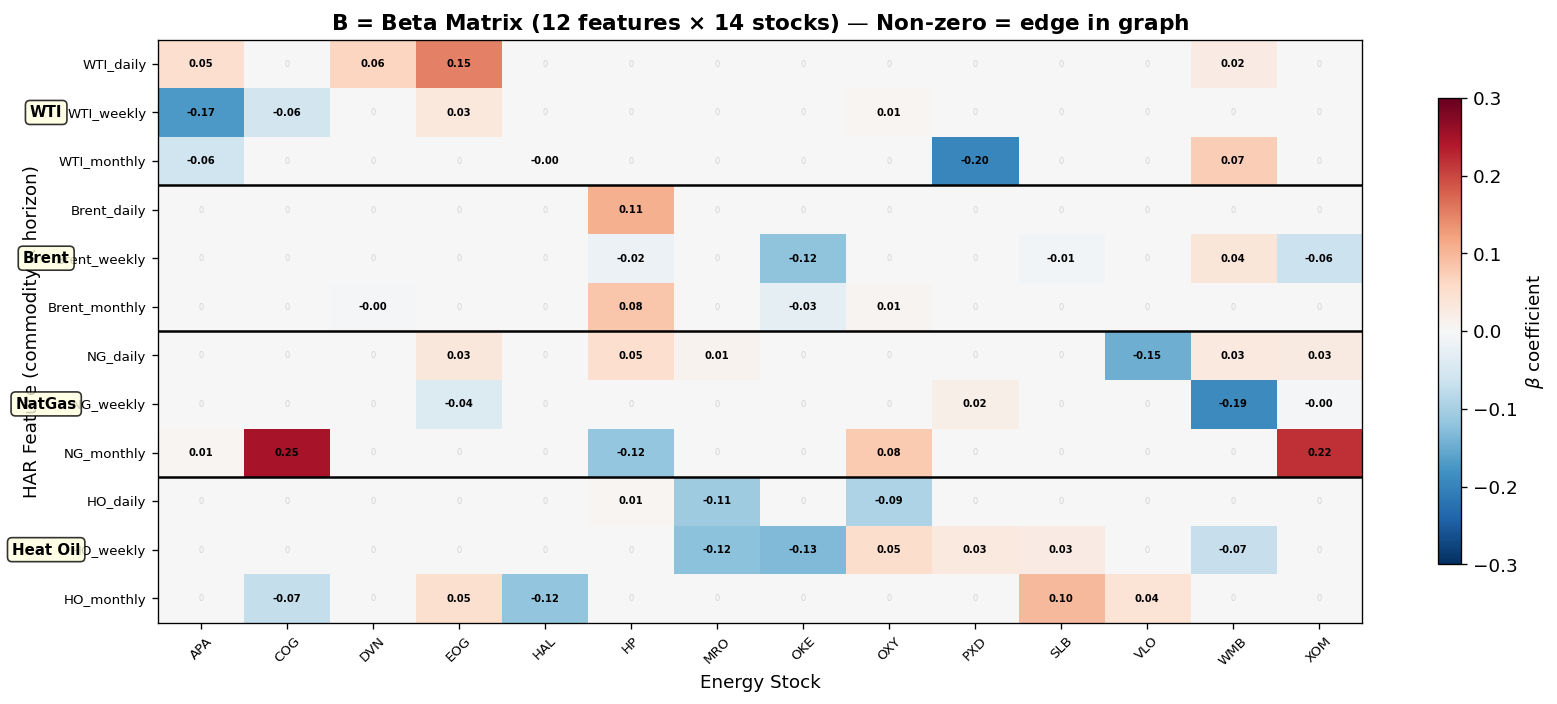

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))

# Create a sparse beta matrix (mostly zeros)
np.random.seed(42)
B = np.random.randn(12, 14) * 0.1
mask = np.random.rand(12, 14) > 0.3  # 70% sparse
B[mask] = 0

im = ax.imshow(B, cmap='RdBu_r', aspect='auto', vmin=-0.3, vmax=0.3)
plt.colorbar(im, ax=ax, label=r'$\beta$ coefficient', shrink=0.8)

# Labels
feature_labels = ['WTI_daily', 'WTI_weekly', 'WTI_monthly',
                  'Brent_daily', 'Brent_weekly', 'Brent_monthly',
                  'NG_daily', 'NG_weekly', 'NG_monthly',
                  'HO_daily', 'HO_weekly', 'HO_monthly']
stock_labels = ['APA','COG','DVN','EOG','HAL','HP','MRO','OKE','OXY','PXD','SLB','VLO','WMB','XOM']

ax.set_yticks(range(12))
ax.set_yticklabels(feature_labels, fontsize=8)
ax.set_xticks(range(14))
ax.set_xticklabels(stock_labels, fontsize=8, rotation=45)

# Commodity group separators
for y in [2.5, 5.5, 8.5]:
    ax.axhline(y, color='black', linewidth=1.5)

# Annotate non-zeros
for i in range(12):
    for j in range(14):
        if B[i, j] != 0:
            ax.text(j, i, f'{B[i,j]:.2f}', ha='center', va='center', fontsize=6, fontweight='bold')
        else:
            ax.text(j, i, '0', ha='center', va='center', fontsize=5, color='lightgray')

ax.set_title(r'$\mathbf{B}$ = Beta Matrix (12 features × 14 stocks) — Non-zero = edge in graph',
             fontsize=13, fontweight='bold')
ax.set_ylabel('HAR Feature (commodity × horizon)')
ax.set_xlabel('Energy Stock')

# Group labels on left
for i, name in enumerate(['WTI', 'Brent', 'NatGas', 'Heat Oil']):
    ax.text(-1.8, i*3 + 1, name, fontsize=9, ha='center', va='center',
            fontweight='bold', rotation=0,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

---
## Step 5: Beta Matrix → Bipartite Graph

**Rule:** Draw a directed edge from commodity node $c$ to stock node $i$ if **any** of the 3 horizon betas are non-zero:

$$\text{Edge}(c \to i) \iff \exists\, k \in \{d, w, m\} : \beta_{i,c}^{(k)} \neq 0$$

Edge weight = $\sum_k |\beta_{i,c}^{(k)}|$ and edge color encodes which horizon dominates.

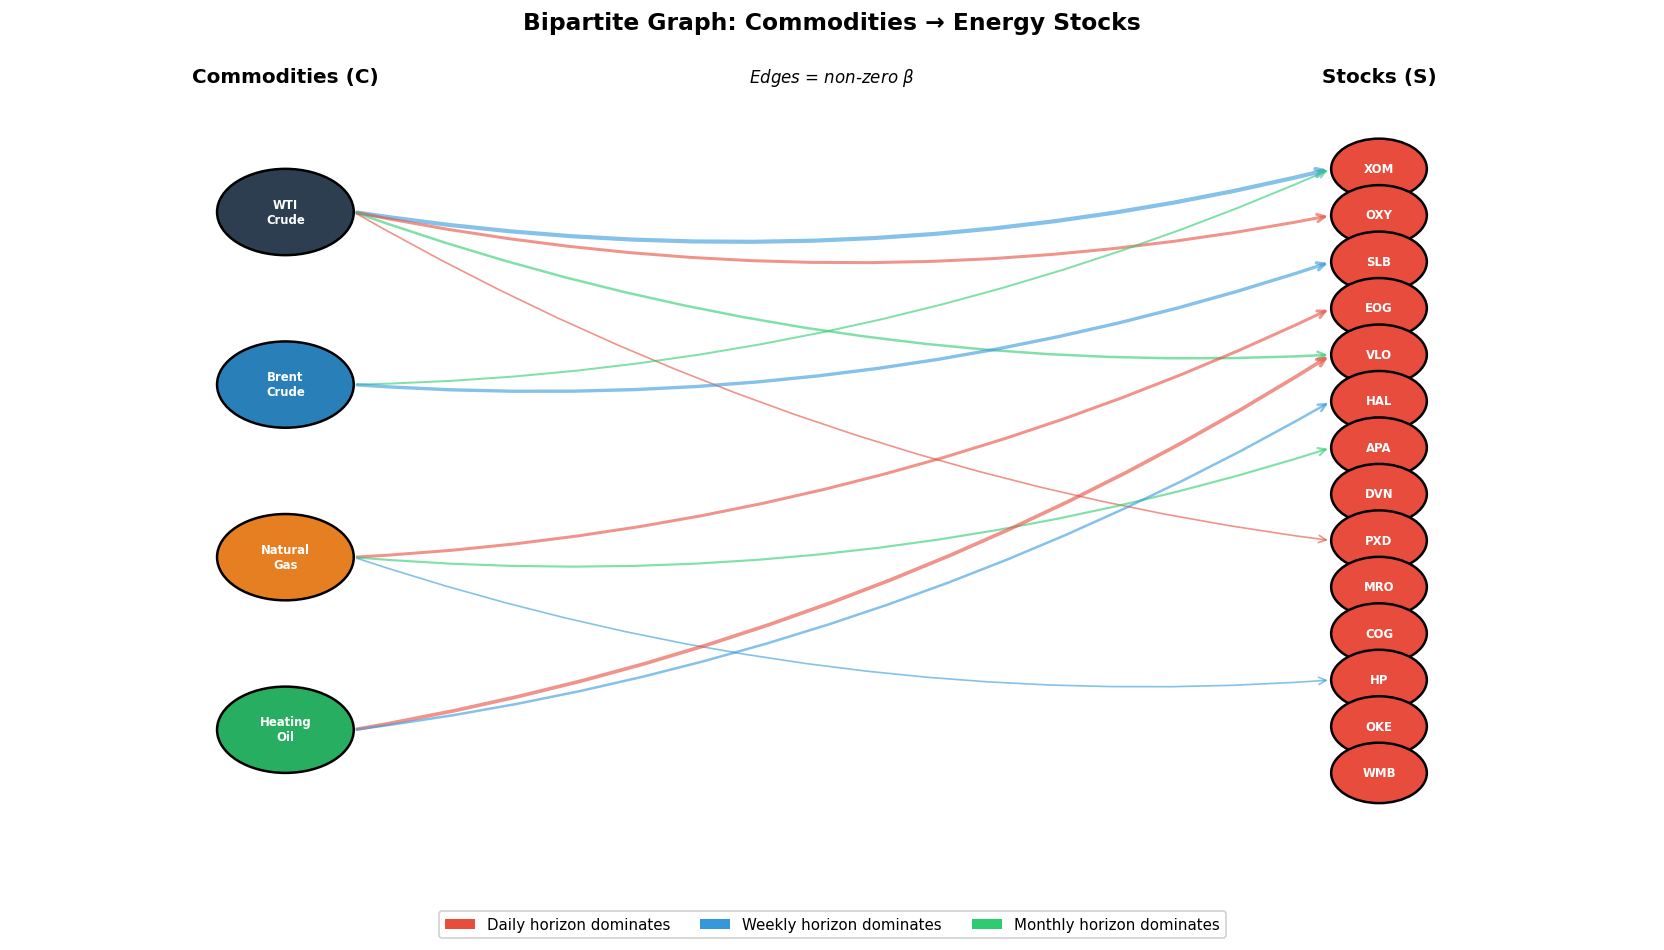

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 9)
ax.axis('off')
ax.set_title('Bipartite Graph: Commodities → Energy Stocks', fontsize=14, fontweight='bold')

# Commodity nodes (left side)
commodities = ['WTI Crude', 'Brent Crude', 'Natural Gas', 'Heating Oil']
comm_y = [7, 5, 3, 1]
comm_colors = ['#2C3E50', '#2980B9', '#E67E22', '#27AE60']

for y, name, color in zip(comm_y, commodities, comm_colors):
    circle = plt.Circle((1, y), 0.5, color=color, ec='black', linewidth=1.5, zorder=5)
    ax.add_patch(circle)
    ax.text(1, y, name.replace(' ', '\n'), ha='center', va='center', fontsize=7,
            color='white', fontweight='bold', zorder=6)

# Stock nodes (right side)
stocks = ['XOM', 'OXY', 'SLB', 'EOG', 'VLO', 'HAL', 'APA', 'DVN', 'PXD', 'MRO', 'COG', 'HP', 'OKE', 'WMB']
stock_y = np.linspace(7.5, 0.5, 14)

for y, name in zip(stock_y, stocks):
    circle = plt.Circle((9, y), 0.35, color='#E74C3C', ec='black', linewidth=1.5, zorder=5)
    ax.add_patch(circle)
    ax.text(9, y, name, ha='center', va='center', fontsize=7,
            color='white', fontweight='bold', zorder=6)

# Draw some example edges (sparse — not all connected)
edges = [
    # (commodity_idx, stock_idx, width, horizon_label)
    (0, 0, 2.5, 'w'),    # WTI → XOM (weekly)
    (0, 1, 1.8, 'd'),    # WTI → OXY (daily)
    (0, 4, 1.5, 'm'),    # WTI → VLO (monthly)
    (0, 8, 1.0, 'd'),    # WTI → PXD (daily)
    (1, 0, 1.2, 'm'),    # Brent → XOM (monthly)
    (1, 2, 2.0, 'w'),    # Brent → SLB (weekly)
    (2, 3, 1.8, 'd'),    # NG → EOG (daily)
    (2, 6, 1.3, 'm'),    # NG → APA (monthly)
    (2, 11, 1.0, 'w'),   # NG → HP (weekly)
    (3, 4, 2.2, 'd'),    # HO → VLO (daily)
    (3, 5, 1.5, 'w'),    # HO → HAL (weekly)
]

horizon_colors = {'d': '#E74C3C', 'w': '#3498DB', 'm': '#2ECC71'}
horizon_names = {'d': 'Daily', 'w': 'Weekly', 'm': 'Monthly'}

for ci, si, width, hz in edges:
    color = horizon_colors[hz]
    ax.annotate('', xy=(8.65, stock_y[si]), xytext=(1.5, comm_y[ci]),
                arrowprops=dict(arrowstyle='->', lw=width, color=color, alpha=0.6,
                               connectionstyle='arc3,rad=0.1'))

# Legend
legend_elements = [
    mpatches.Patch(facecolor='#E74C3C', label='Daily horizon dominates'),
    mpatches.Patch(facecolor='#3498DB', label='Weekly horizon dominates'),
    mpatches.Patch(facecolor='#2ECC71', label='Monthly horizon dominates'),
]
ax.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=9,
          framealpha=0.9, bbox_to_anchor=(0.5, -0.05))

# Labels
ax.text(1, 8.5, 'Commodities (C)', fontsize=12, ha='center', fontweight='bold')
ax.text(9, 8.5, 'Stocks (S)', fontsize=12, ha='center', fontweight='bold')
ax.text(5, 8.5, r'Edges = non-zero $\beta$', fontsize=10, ha='center', style='italic')

plt.tight_layout()
plt.show()

---
## Step 6: Full Pipeline Summary

Putting it all together with concrete dimensions:

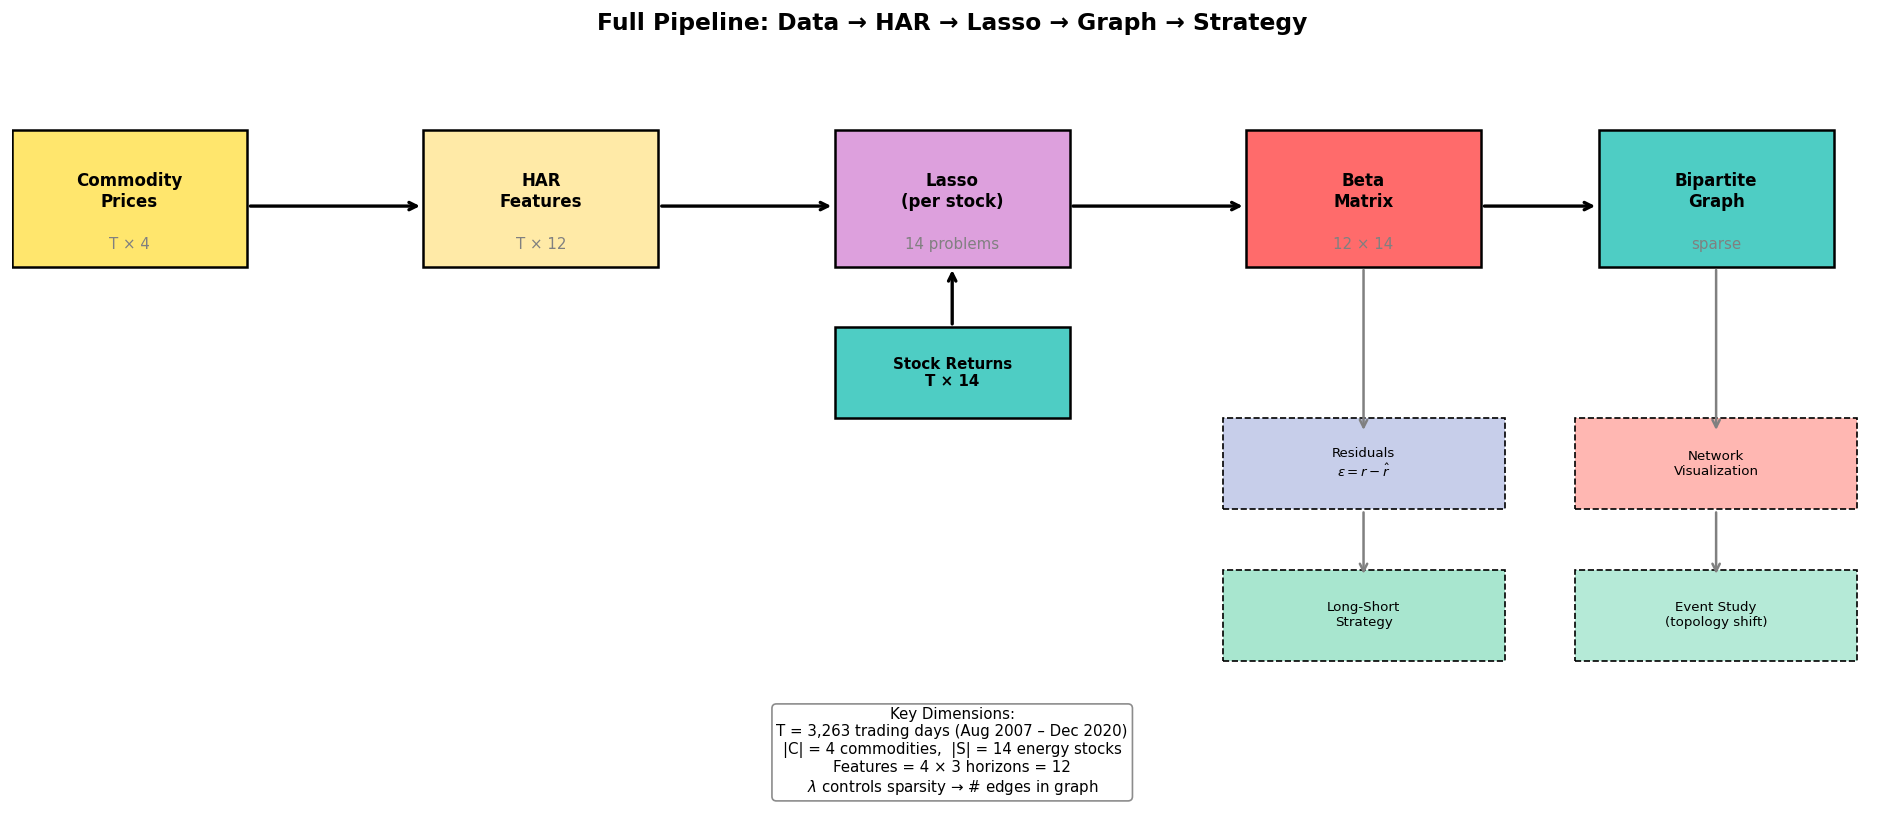

In [7]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.axis('off')

# Step boxes
steps = [
    (1, 8, 'Commodity\nPrices', 'T × 4', '#FFE66D'),
    (4.5, 8, 'HAR\nFeatures', 'T × 12', '#FFEAA7'),
    (8, 8, 'Lasso\n(per stock)', '14 problems', '#DDA0DD'),
    (11.5, 8, 'Beta\nMatrix', '12 × 14', '#FF6B6B'),
    (14.5, 8, 'Bipartite\nGraph', 'sparse', '#4ECDC4'),
]

for x, y, label, dim, color in steps:
    rect = plt.Rectangle((x-1, y-0.8), 2, 1.8, fill=True, facecolor=color,
                          edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(rect)
    ax.text(x, y+0.2, label, ha='center', va='center', fontsize=10, fontweight='bold', zorder=4)
    ax.text(x, y-0.5, dim, ha='center', va='center', fontsize=9, color='gray', zorder=4)

# Arrows between steps
for x1, x2 in [(2, 3.5), (5.5, 7), (9, 10.5), (12.5, 13.5)]:
    ax.annotate('', xy=(x2, 8), xytext=(x1, 8),
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Stock returns input
rect_r = plt.Rectangle((7, 5.2), 2, 1.2, fill=True, facecolor='#4ECDC4',
                         edgecolor='black', linewidth=1.5, zorder=3)
ax.add_patch(rect_r)
ax.text(8, 5.8, 'Stock Returns\nT × 14', ha='center', va='center', fontsize=9, fontweight='bold', zorder=4)
ax.annotate('', xy=(8, 7.2), xytext=(8, 6.4),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Downstream applications
apps = [
    (11.5, 4.5, 'Residuals\n'+r'$\epsilon = r - \hat{r}$', '#C7CEEA'),
    (11.5, 2.5, 'Long-Short\nStrategy', '#A8E6CF'),
    (14.5, 4.5, 'Network\nVisualization', '#FFB7B2'),
    (14.5, 2.5, 'Event Study\n(topology shift)', '#B5EAD7'),
]

for x, y, label, color in apps:
    rect = plt.Rectangle((x-1.2, y-0.5), 2.4, 1.2, fill=True, facecolor=color,
                          edgecolor='black', linewidth=1, zorder=3, linestyle='--')
    ax.add_patch(rect)
    ax.text(x, y+0.1, label, ha='center', va='center', fontsize=8, zorder=4)

# Arrows to applications
ax.annotate('', xy=(11.5, 5.0), xytext=(11.5, 7.2),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
ax.annotate('', xy=(11.5, 3.1), xytext=(11.5, 4.0),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
ax.annotate('', xy=(14.5, 5.0), xytext=(14.5, 7.2),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
ax.annotate('', xy=(14.5, 3.1), xytext=(14.5, 4.0),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))

# Title
ax.set_title('Full Pipeline: Data → HAR → Lasso → Graph → Strategy', 
             fontsize=14, fontweight='bold', pad=15)

# Dimension annotations
ax.text(8, 0.8, 'Key Dimensions:\n'
        'T = 3,263 trading days (Aug 2007 – Dec 2020)\n'
        '|C| = 4 commodities,  |S| = 14 energy stocks\n'
        'Features = 4 × 3 horizons = 12\n'
        r'$\lambda$ controls sparsity → # edges in graph',
        ha='center', va='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()

---
## Step 7: What λ Does — Sparsity vs Fit

The L1 penalty geometry is why Lasso produces **exact zeros** (unlike Ridge/L2).

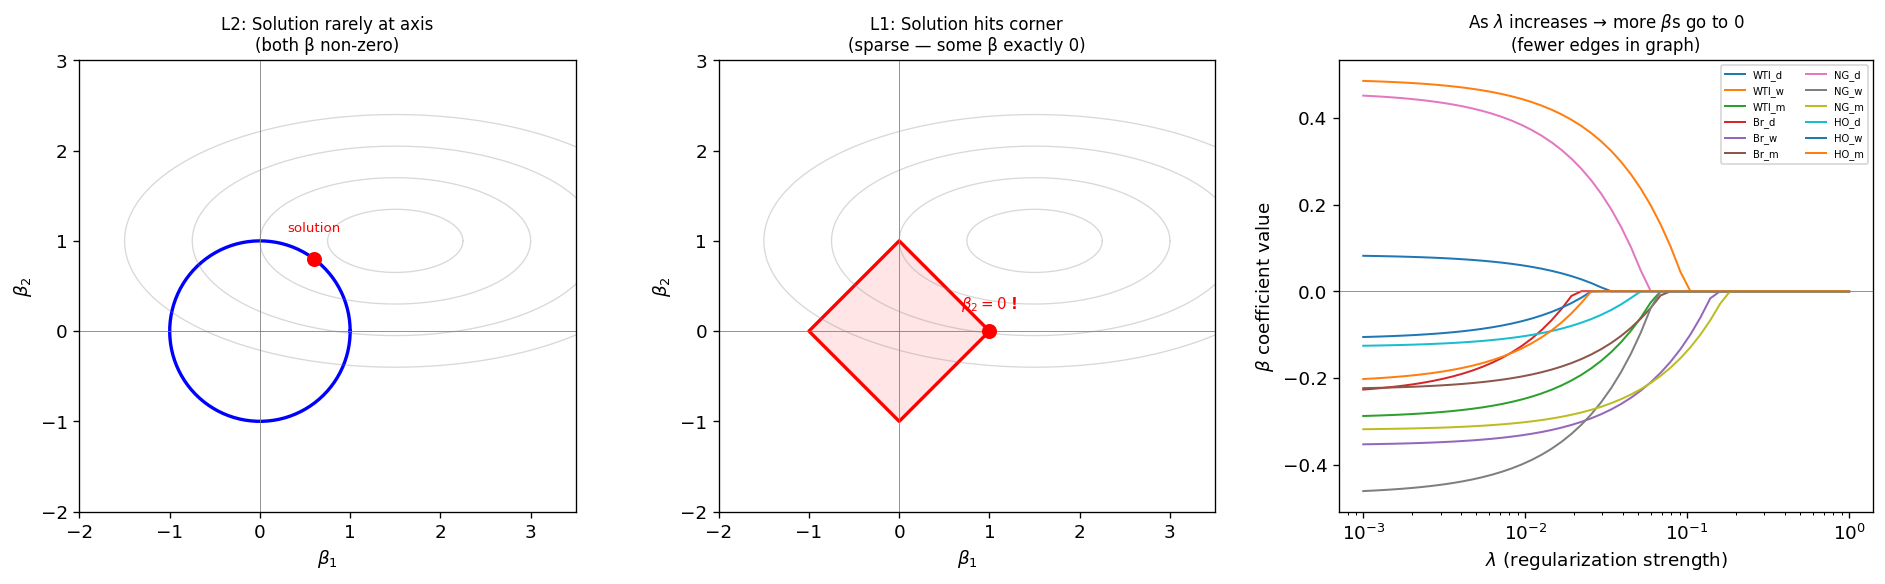

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# L1 vs L2 constraint geometry
theta = np.linspace(0, 2*np.pi, 200)

# L2 (Ridge) — circle
ax = axes[0]
ax.plot(np.cos(theta), np.sin(theta), 'b-', linewidth=2, label='L2 (Ridge)')
# Elliptical contours of loss
for r in [0.5, 1.0, 1.5, 2.0]:
    ax.plot(r*np.cos(theta)*1.5 + 1.5, r*np.sin(theta)*0.7 + 1, 'gray', alpha=0.3, linewidth=0.8)
ax.plot(0.6, 0.8, 'ro', markersize=8, zorder=5)
ax.text(0.6, 1.1, 'solution', fontsize=8, ha='center', color='red')
ax.set_xlim(-2, 3.5)
ax.set_ylim(-2, 3)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')
ax.set_title('L2: Solution rarely at axis\n(both β non-zero)', fontsize=10)
ax.set_aspect('equal')

# L1 (Lasso) — diamond
ax = axes[1]
diamond_x = [1, 0, -1, 0, 1]
diamond_y = [0, 1, 0, -1, 0]
ax.plot(diamond_x, diamond_y, 'r-', linewidth=2, label='L1 (Lasso)')
ax.fill(diamond_x, diamond_y, alpha=0.1, color='red')
for r in [0.5, 1.0, 1.5, 2.0]:
    ax.plot(r*np.cos(theta)*1.5 + 1.5, r*np.sin(theta)*0.7 + 1, 'gray', alpha=0.3, linewidth=0.8)
ax.plot(1, 0, 'ro', markersize=8, zorder=5)
ax.text(1, 0.25, r'$\beta_2 = 0$ !', fontsize=9, ha='center', color='red', fontweight='bold')
ax.set_xlim(-2, 3.5)
ax.set_ylim(-2, 3)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')
ax.set_title('L1: Solution hits corner\n(sparse — some β exactly 0)', fontsize=10)
ax.set_aspect('equal')

# Lambda path
ax = axes[2]
np.random.seed(7)
lambdas = np.logspace(-3, 0, 50)
n_features = 12
betas_path = np.zeros((50, n_features))
for j in range(n_features):
    strength = np.random.uniform(0.05, 0.5)
    cutoff = np.random.uniform(-2.5, -0.5)
    betas_path[:, j] = np.maximum(0, strength - lambdas * np.exp(-cutoff)) * np.random.choice([-1, 1])

labels_short = ['WTI_d', 'WTI_w', 'WTI_m', 'Br_d', 'Br_w', 'Br_m',
                'NG_d', 'NG_w', 'NG_m', 'HO_d', 'HO_w', 'HO_m']
for j in range(n_features):
    ax.plot(lambdas, betas_path[:, j], linewidth=1.2, label=labels_short[j])

ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$ (regularization strength)')
ax.set_ylabel(r'$\beta$ coefficient value')
ax.set_title(r'As $\lambda$ increases → more $\beta$s go to 0' + '\n(fewer edges in graph)', fontsize=10)
ax.axhline(0, color='gray', linewidth=0.5)
ax.legend(fontsize=6, ncol=2, loc='upper right')

plt.tight_layout()
plt.show()

---
## Summary: The Math in One Equation

For each stock $i$:

$$\boxed{\min_{\boldsymbol{\beta}_i \in \mathbb{R}^{12}} \sum_{t=1}^{3263} \left( r_{i,t} - \sum_{c \in \{\text{WTI, Brent, NG, HO}\}} \sum_{k \in \{d, w, m\}} \beta_{i,c}^{(k)} \cdot X_{c,t}^{(k)} \right)^2 + \lambda \sum_{c,k} |\beta_{i,c}^{(k)}|}$$

- **Input**: $\mathbf{X} \in \mathbb{R}^{3263 \times 12}$ (HAR features from commodity prices)
- **Target**: $\mathbf{r}_i \in \mathbb{R}^{3263}$ (stock $i$ returns from CRSP)
- **Output**: $\boldsymbol{\beta}_i \in \mathbb{R}^{12}$ (sparse) → non-zeros become **edges** in the bipartite graph
- **Repeat** for all 14 stocks → full network
- **Interpretation**: if $\beta_{\text{XOM, WTI}}^{(w)} \neq 0$, then WTI weekly returns **predict** XOM returns